-Generate dataset using make_classification function in the sklearn.datasets class. Generate 10000 samples with 8 features (X) with one label (y). Also, use following parameters
    -n_informative = 5
    -class_sep = 2
    -random_state = 42
-Explore and analyse raw data.
-Do preprocessing for classification.
-Split your dataset into train and test test (0.7 for train and 0.3 for test).
-Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)
-Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

In [196]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [197]:
# Generate dataset using make_classification function in the sklearn. 
# Convert it into pandas dataframe.
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=8, n_informative=5,
                           class_sep=2, random_state=42)
df = pd.DataFrame(np.c_[X, y])
df.head()

,0,1,2,3,4,5,6,7,8
0,-0.756153,-1.164471,-0.705182,1.108321,-1.078425,0.990766,1.363777,1.727296,0.0
1,-0.349763,-0.725064,-0.776536,0.164623,-2.123291,-0.312199,0.081420,1.073886,0.0
2,-4.390672,-1.590640,-1.343470,9.286103,2.222753,1.085890,-2.715076,4.223089,1.0
3,1.064793,0.967040,-0.723131,-3.114630,0.798928,0.214848,1.890636,-2.379626,1.0
4,-0.561940,-1.914989,0.953398,1.090123,-1.048063,-0.600604,1.511169,0.550706,0.0


In [198]:
# Check duplicate values and missing data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
dtypes: float64(9)
memory usage: 70.4 KB


In [199]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [200]:
df.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

<Figure size 1152x576 with 0 Axes>

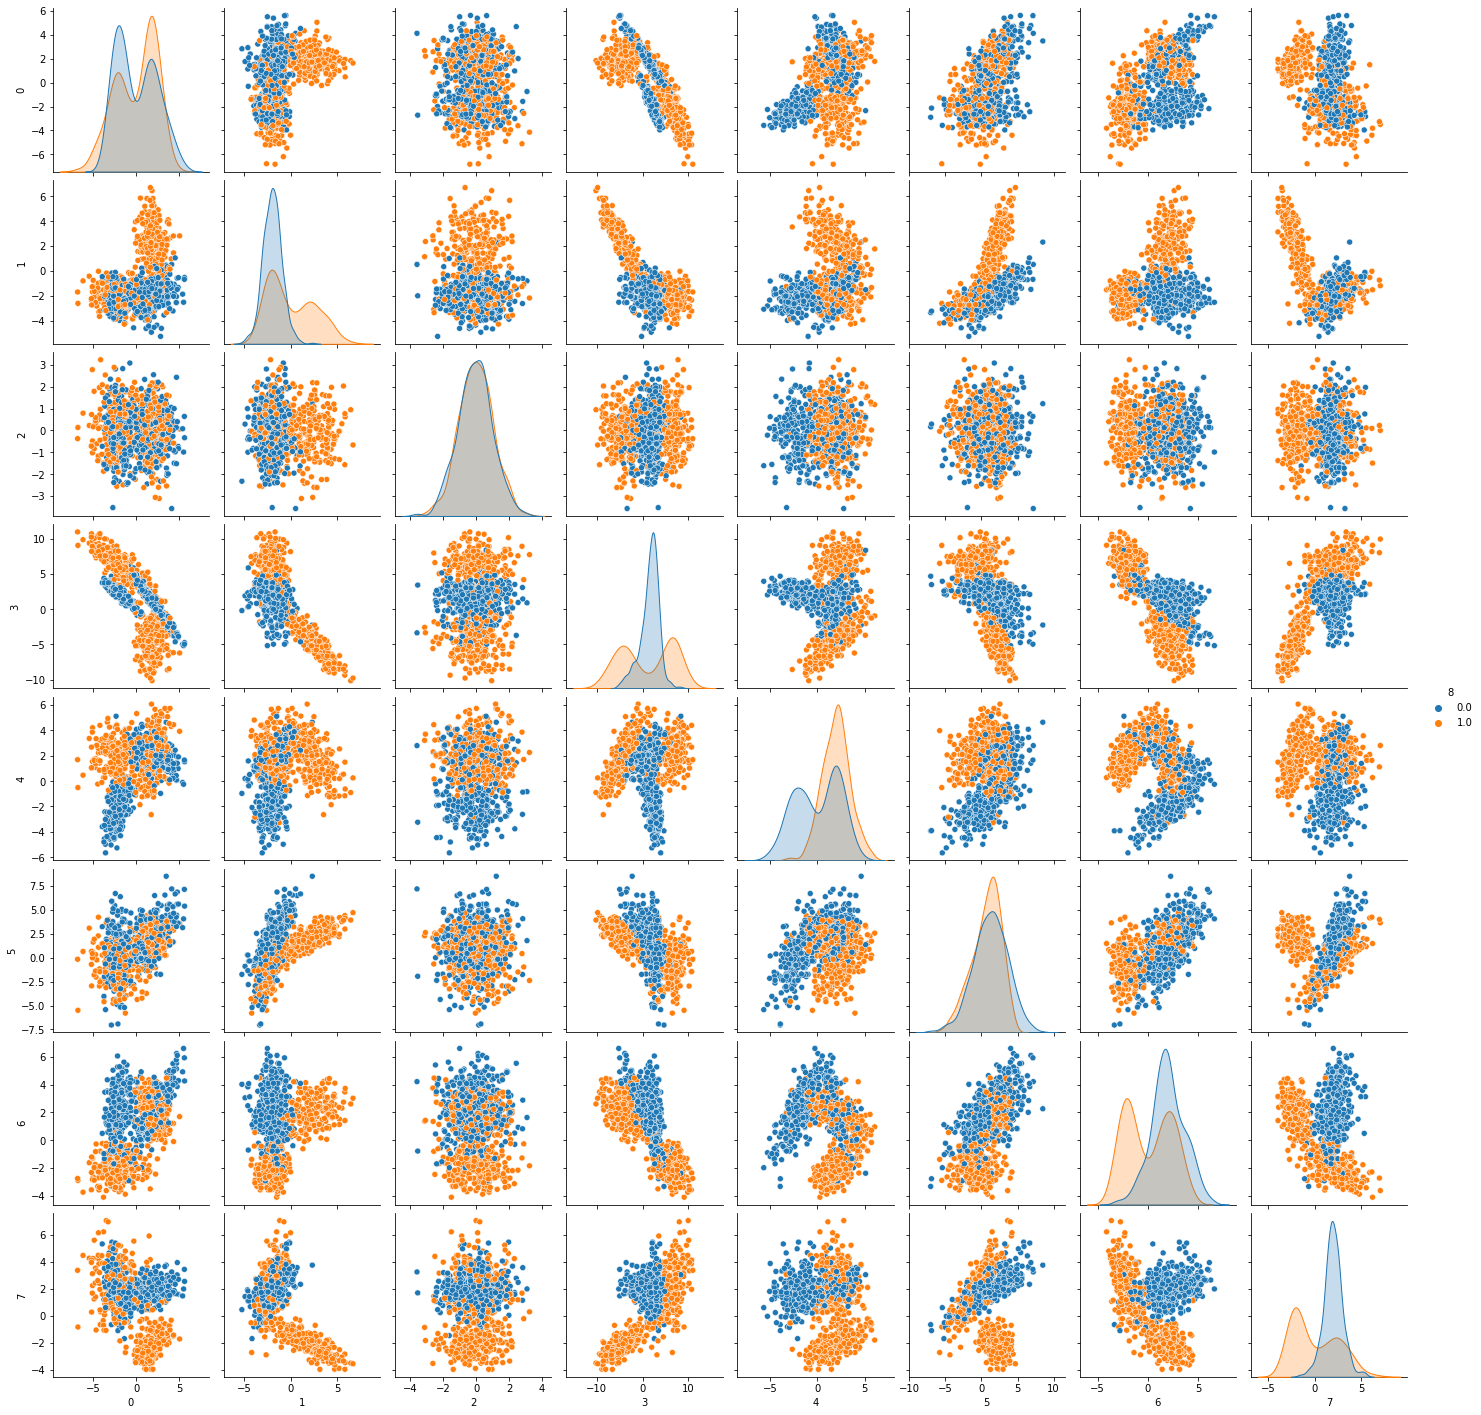

<Figure size 1152x576 with 0 Axes>

In [201]:
# Visualize data for each feature (pairplot,distplot).
import seaborn as sns
sns.pairplot(df, hue=8)
plt.figure(figsize=(16,8))

/data/anaconda/anaconda3/envs/env_jupyterhub/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


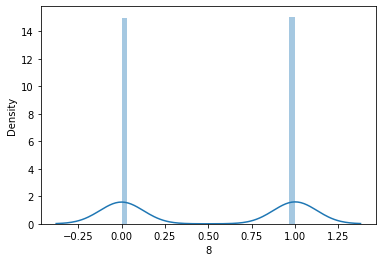

In [202]:
sns.distplot(df[8], bins=30)
plt.show()

<AxesSubplot:>

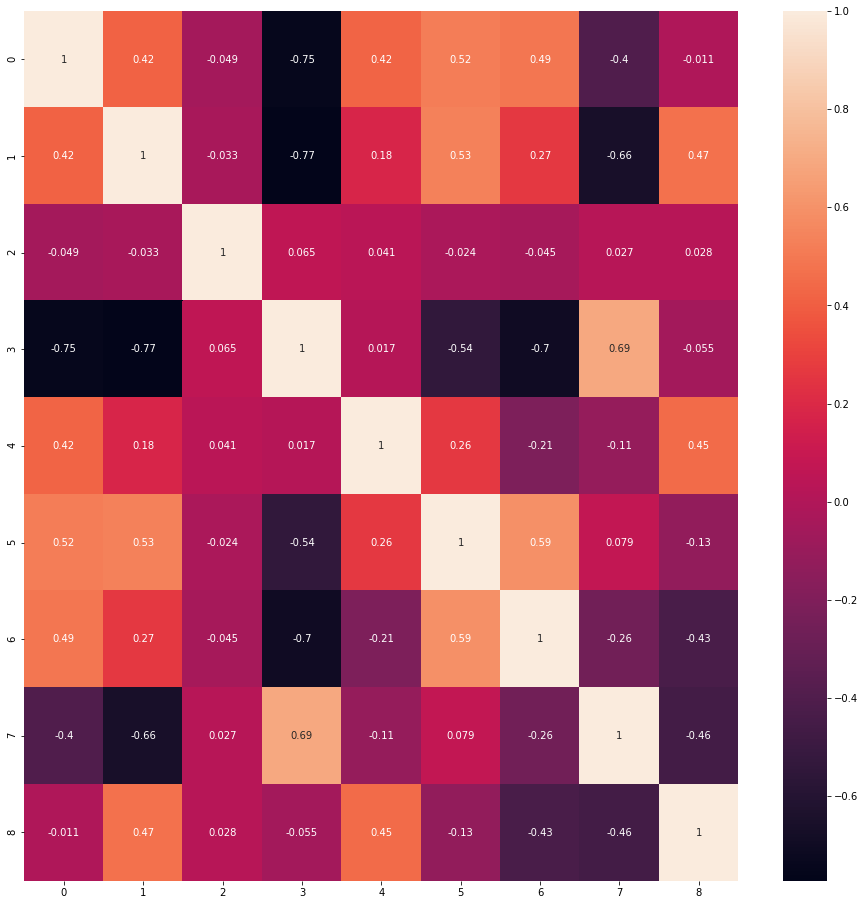

In [203]:
# Draw correlation matrix.
corr = df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(data=corr, annot=True)

In [204]:
# Handle outliers (you can use IsolationForest, Z-score, IQR)
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
z

array([[0.3147762 , 0.07958996, 0.63567808, ..., 0.16407219, 0.35587728,
        1.00400803],
       [0.14309631, 0.12370915, 0.70412792, ..., 0.41405454, 0.04920046,
        1.00400803],
       [1.85018486, 0.27676419, 1.24798476, ..., 1.67480255, 1.52727275,
        0.99600797],
       ...,
       [0.7948603 , 0.25018552, 0.76093524, ..., 1.71314673, 0.93007299,
        0.99600797],
       [0.32250431, 2.21240704, 0.35056551, ..., 0.5874893 , 1.7494309 ,
        0.99600797],
       [1.51706964, 0.43299196, 2.47896247, ..., 1.42863043, 0.09850057,
        0.99600797]])

In [205]:
outliers = list(set(np.where(z > 3)[0]))

len(outliers)

15

In [206]:
new_df = df.drop(outliers,axis = 0).reset_index(drop = True)
display(new_df)

,0,1,2,3,4,5,6,7,8
0,-0.756153,-1.164471,-0.705182,1.108321,-1.078425,0.990766,1.363777,1.727296,0.0
1,-0.349763,-0.725064,-0.776536,0.164623,-2.123291,-0.312199,0.081420,1.073886,0.0
2,-4.390672,-1.590640,-1.343470,9.286103,2.222753,1.085890,-2.715076,4.223089,1.0
3,1.064793,0.967040,-0.723131,-3.114630,0.798928,0.214848,1.890636,-2.379626,1.0
4,-0.561940,-1.914989,0.953398,1.090123,-1.048063,-0.600604,1.511169,0.550706,0.0
...,...,...,...,...,...,...,...,...,...
980,2.887202,-1.045570,-0.668876,-0.884461,1.973363,3.040845,2.151270,1.966244,0.0
981,-0.912929,-1.251949,1.179913,1.833829,-0.211064,1.078609,1.239636,1.703973,0.0
982,-1.892576,-1.533193,0.750693,5.846840,0.844300,-0.304302,-2.800129,2.950686,1.0
983,0.752376,3.789408,-0.407971,-5.246543,1.449600,2.763538,2.302969,-2.758305,1.0


In [207]:
X, y = new_df.iloc[: , :-1], new_df.iloc[: , -1]

In [208]:
# Split dataset into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [209]:
# Import Decision Tree, define different hyperparamters and tune the algorithm.
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf.fit(X_train,y_train)

print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.97677793904209
Accuracy of test: 0.9662162162162162


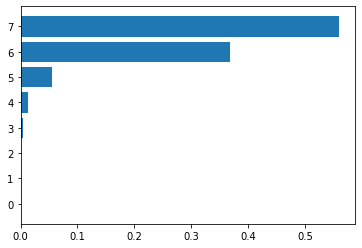

In [210]:
# Visualize feature importances.
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.barh(range(len(indices)), importances[indices])
plt.show()

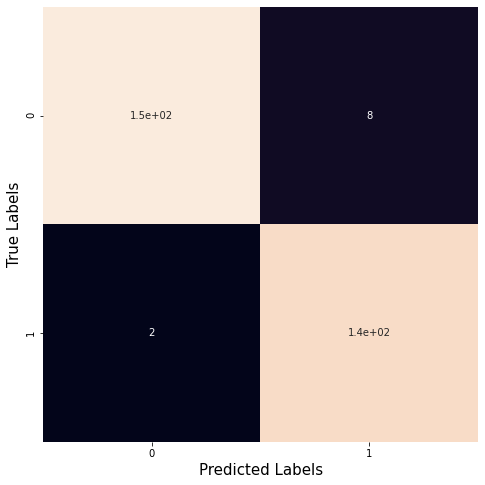

In [211]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score

pred = clf.predict(X_test)
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [212]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.9662162162162162
Recall = 0.9669837205048473
Accuracy = 0.9662162162162162
F1 Score = 0.9662023292989267


In [216]:
# Import XGBoostClassifier, define different hyperparamters and tune the algorithm.
import xgboost as xgb

dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':2}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

In [217]:
preds = model.predict(dmatrix_test)
preds[:10]

array([[0.00164339, 0.99835664],
       [0.03438988, 0.96561015],
       [0.00164339, 0.99835664],
       [0.02032482, 0.9796752 ],
       [0.00520411, 0.99479586],
       [0.9893175 , 0.01068246],
       [0.00164339, 0.99835664],
       [0.99508506, 0.00491488],
       [0.19484138, 0.8051586 ],
       [0.8202961 , 0.17970389]], dtype=float32)

In [218]:
best_preds = np.asarray([np.argmax(line) for line in preds])

In [219]:
best_preds

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [220]:
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.9558575017127198
Recall = 0.9564203402231571
Accuracy = 0.956081081081081


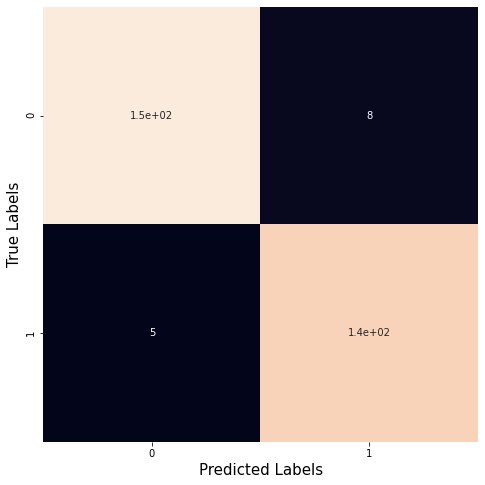

In [221]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, best_preds)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [223]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,6,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.00001,0.001,0.01,0.1,1,2],
    'n_estimators': [10,190,200,210,500,1000,2000]
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
                    min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, 
                    objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=42)

clf = GridSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

Tuned: {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 1000}
Mean of the cv scores is 0.976774
Train Score 0.989840
Test Score 0.962838
Seconds used for refitting the best model on the train dataset: 0.219199


[0.04238639 0.08472243 0.00534718 0.13354552 0.06318993 0.02693566
 0.3440207  0.29985213]


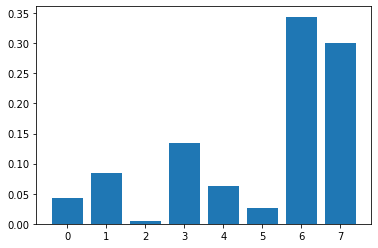

In [227]:
# Visualize feature importances.
from matplotlib import pyplot
xgc.fit(X, y)
print(xgc.feature_importances_)
pyplot.bar(range(len(xgc.feature_importances_)), xgc.feature_importances_)
pyplot.show()

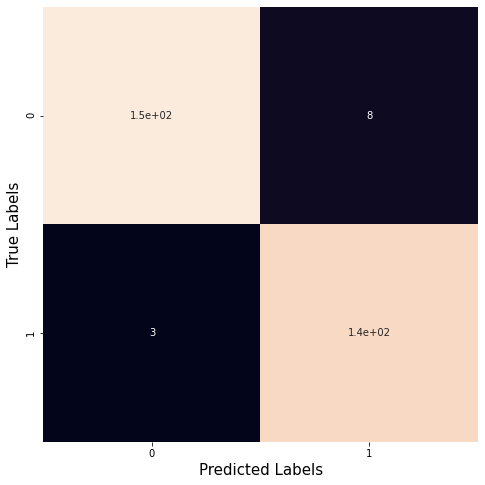

In [231]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.
plt.figure(figsize=(12, 8))

xgb_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, xgb_pred)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [ ]:
# Evaluate your result and select best performing algorithm for our case.
# When we check the scores and confusion matrix, we can end with XGBoostClassifier model perform better than others. But still needs to parameter tuning.